<h1>Advance Data Science Capstone Project</h1>

<h1>Vaccination against COVID vs. New Cases of COVID</h1>
<h2>(Machine Learning)</h2>

Here I am going to develop models of the progress of vaccination and full vaccination in the world. 

Here I am going to develop models of the progress of vaccination and full vaccination in the world. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#reading datasets which was created in the previous notebook
df_world1 = pd.read_csv("covid-data-world-vaccination.csv")
df_world2 = pd.read_csv("covid-data-world-full-vaccination.csv")
df_world3 = pd.read_csv("covid-data-world-revaccination.csv")
df_world1 = df_world1[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_world2 = df_world2[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_world3 = df_world3[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]

In [3]:
df_world1.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,World,2020-12-01,64070445.0,621019.0,1538151.0,12723.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
1,World,2020-12-02,64724036.0,653591.0,1550814.0,12663.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
2,World,2020-12-03,65420332.0,696296.0,1563393.0,12579.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
3,World,2020-12-04,66108917.0,688585.0,1575836.0,12443.0,1.0,2.0,0.0,0.0,1.0,7.874966e+09
4,World,2020-12-05,66755295.0,646378.0,1586163.0,10327.0,1.0,2.0,0.0,0.0,0.0,7.874966e+09


<h2>Feature Engineering</h2>

For machine training, dates need to be transformed into date_delta.

In [4]:
df_world1_ml = df_world1[['people_vaccinated','date']]
df_world1_ml['date_s'] = pd.to_datetime(df_world1_ml['date'])
df_world1_ml['date_delta'] = (df_world1_ml['date_s'] - df_world1_ml['date_s'].min())  / np.timedelta64(1,'D')
df_world1_ml.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,people_vaccinated,date,date_s,date_delta
405,4.670830e+09,2022-01-10,2022-01-10,405.0
406,4.679829e+09,2022-01-11,2022-01-11,406.0
407,4.691776e+09,2022-01-12,2022-01-12,407.0
408,4.699017e+09,2022-01-13,2022-01-13,408.0
409,4.702962e+09,2022-01-14,2022-01-14,409.0


In [5]:
df_world1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   people_vaccinated  410 non-null    float64       
 1   date               410 non-null    object        
 2   date_s             410 non-null    datetime64[ns]
 3   date_delta         410 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.9+ KB


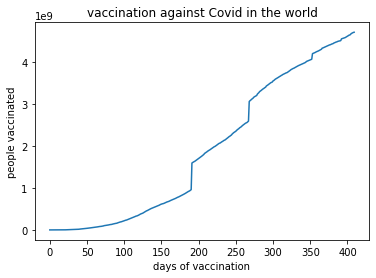

In [6]:
plt.plot(df_world1_ml['date_delta'], df_world1_ml['people_vaccinated'])
plt.xlabel("days of vaccination")
plt.ylabel("people vaccinated")
plt.title("vaccination against Covid in the world")
plt.show()

In [7]:
df_world2_ml = df_world2[['people_fully_vaccinated','date']]
df_world2_ml['date_s'] = pd.to_datetime(df_world2_ml['date'])
df_world2_ml['date_delta'] = (df_world2_ml['date_s'] - df_world2_ml['date_s'].min())  / np.timedelta64(1,'D')
df_world2_ml.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,people_fully_vaccinated,date,date_s,date_delta
393,3.980857e+09,2022-01-10,2022-01-10,393.0
394,3.990695e+09,2022-01-11,2022-01-11,394.0
395,3.999698e+09,2022-01-12,2022-01-12,395.0
396,4.007912e+09,2022-01-13,2022-01-13,396.0
397,4.011094e+09,2022-01-14,2022-01-14,397.0


In [8]:
df_world2_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   people_fully_vaccinated  398 non-null    float64       
 1   date                     398 non-null    object        
 2   date_s                   398 non-null    datetime64[ns]
 3   date_delta               398 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.6+ KB


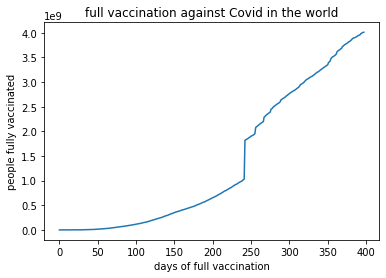

In [9]:
plt.plot(df_world2_ml['date_delta'], df_world2_ml['people_fully_vaccinated'])
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated")
plt.title("full vaccination against Covid in the world")
plt.show()

<h2>Models of progress of vaccination (at least, one dose)</h2>

<h3>(Model definition, training, and evaluation)</h3>

<h3>1. Linear regression model</h3>

In [10]:
model_dataset1 = np.random.rand(len(df_world1_ml)) < 0.8
train1 = df_world1_ml[model_dataset1]
test1 = df_world1_ml[~model_dataset1]

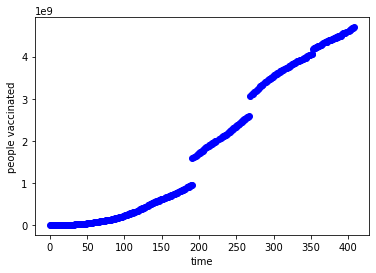

In [11]:
plt.scatter(train1.date_delta, train1.people_vaccinated, color='blue')
plt.xlabel("time")
plt.ylabel("people vaccinated")
plt.show()

In [12]:
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['date_delta']])
train_y1 = np.asanyarray(train1[['people_vaccinated']])
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[13668647.75015634]]
Intercept:  [-8.98120238e+08]


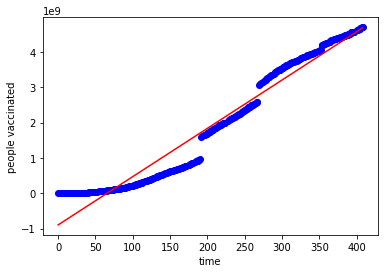

In [13]:
plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("time")
plt.ylabel("people vaccinated")
plt.show()

In [14]:
test_x1 = np.asanyarray(test1[['date_delta']])
test_y1 = np.asanyarray(test1[['people_vaccinated']])
test_y_1 = regr1.predict(test_x1)

metrics.r2_score(test_y1, test_y_1)

0.9566433495056386

<h3>2. Polynomial regression models</h3>

<b>2.1. Quadratic model</b>

In [15]:
poly1_2 = PolynomialFeatures(degree=2)
train_x_poly1_2 = poly1_2.fit_transform(train_x1)

In [16]:
clf1_2 = linear_model.LinearRegression()
train_y_1_2 = clf1_2.fit(train_x_poly1_2, train_y1)
# The coefficients
print ('Coefficients: ', clf1_2.coef_)
print ('Intercept: ',clf1_2.intercept_)

Coefficients:  [[      0.         5115078.037291     21091.49703807]]
Intercept:  [-3.2848389e+08]


Text(0, 0.5, 'people vaccinated')

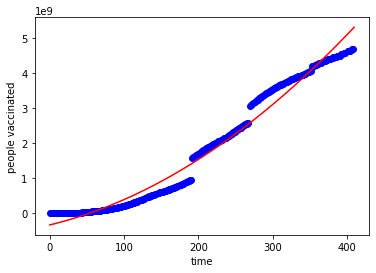

In [17]:
plt.scatter(train1.date_delta, train1.people_vaccinated, color='blue')
XX = np.arange(0.0, 410.0, 0.1)
yy = clf1_2.intercept_[0]+ clf1_2.coef_[0][1]*XX+ clf1_2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people vaccinated")

In [18]:
test_x_poly1_2 = poly1_2.fit_transform(test_x1)
test_y_1_2 = clf1_2.predict(test_x_poly1_2)

metrics.r2_score(test_y1, test_y_1_2)

0.9685659556864114

<b>2.2. Cubic model</b>

In [19]:
poly1_3 = PolynomialFeatures(degree=3)
train_x_poly1_3 = poly1_3.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00 -1.21396895e+07  1.27954092e+05 -1.75530893e+02]]
Intercept:  [2.43358012e+08]


0.9930832284539406

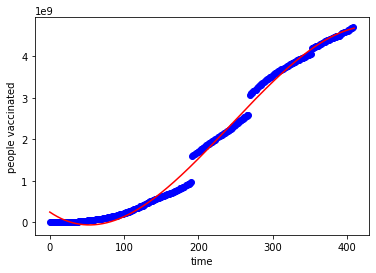

In [20]:
clf1_3 = linear_model.LinearRegression()
train_y_1_3 = clf1_3.fit(train_x_poly1_3, train_y1)
# The coefficients
print ('Coefficients: ', clf1_3.coef_)
print ('Intercept: ',clf1_3.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 410.0, 0.1)
yy = clf1_3.intercept_[0]+ clf1_3.coef_[0][1]*XX+ clf1_3.coef_[0][2]*np.power(XX, 2) + clf1_3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people vaccinated")

test_x_poly1_3 = poly1_3.fit_transform(test_x1)
test_y_1_3 = clf1_3.predict(test_x_poly1_3)

metrics.r2_score(test_y1, test_y_1_3)

<h3>2.3. Degree 4 polynomial regression</h3>

In [21]:
poly1_4 = PolynomialFeatures(degree=4)
train_x_poly1_4 = poly1_4.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00 -3.49938528e+06  3.12077254e+04  1.96639950e+02
  -4.58772189e-01]]
Intercept:  [72903756.40315437]


0.9932369492012724

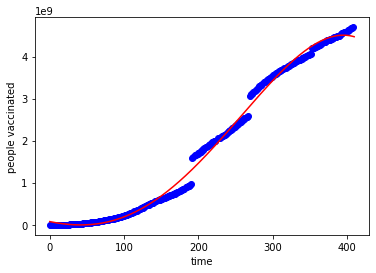

In [22]:
clf1_4 = linear_model.LinearRegression()
train_y_1_4 = clf1_4.fit(train_x_poly1_4, train_y1)
# The coefficients
print ('Coefficients: ', clf1_4.coef_)
print ('Intercept: ',clf1_4.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 410.0, 0.1)
yy = clf1_4.intercept_[0] + clf1_4.coef_[0][1]*XX + clf1_4.coef_[0][2]*np.power(XX, 2) + \
    clf1_4.coef_[0][3]*np.power(XX, 3) + clf1_4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people vaccinated")

test_x_poly1_4 = poly1_4.fit_transform(test_x1)
test_y_1_4 = clf1_4.predict(test_x_poly1_4)

metrics.r2_score(test_y1, test_y_1_4)

<h3>2.4. Degree 5 polynomial regression</h3>

In [23]:
poly1_5 = PolynomialFeatures(degree=5)
train_x_poly1_5 = poly1_5.fit_transform(train_x1)

Coefficients:  [[ 0.00000000e+00  9.37507596e+06 -1.91797752e+05  1.66111858e+03
  -4.50864321e+00  3.97859327e-03]]
Intercept:  [-97052043.77145028]


0.9953888678140455

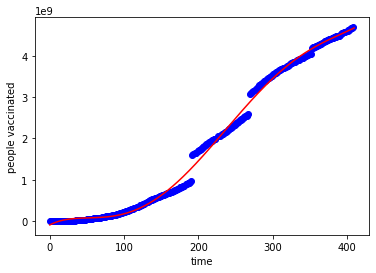

In [24]:
clf1_5 = linear_model.LinearRegression()
train_y_1_5 = clf1_5.fit(train_x_poly1_5, train_y1)
# The coefficients
print ('Coefficients: ', clf1_5.coef_)
print ('Intercept: ',clf1_5.intercept_)

plt.scatter(train1.date_delta, train1.people_vaccinated,  color='blue')
XX = np.arange(0.0, 410.0, 0.1)
yy = clf1_5.intercept_[0] + clf1_5.coef_[0][1]*XX + clf1_5.coef_[0][2]*np.power(XX, 2) + \
    clf1_5.coef_[0][3]*np.power(XX, 3) + clf1_5.coef_[0][4]*np.power(XX, 4) + clf1_5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people vaccinated")

test_x_poly1_5 = poly1_5.fit_transform(test_x1)
test_y_1_5 = clf1_5.predict(test_x_poly1_5)

metrics.r2_score(test_y1, test_y_1_5)

<h2>Models of progress of full vaccination</h2>

<h3>1. Linear regression model<h3>

In [25]:
model_dataset2 = np.random.rand(len(df_world2_ml)) < 0.8
train2 = df_world2_ml[model_dataset2]
test2 = df_world2_ml[~model_dataset2]

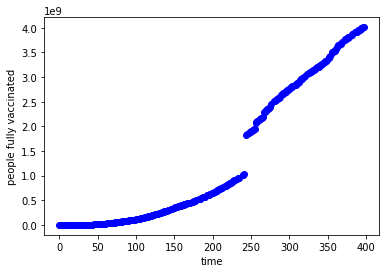

In [26]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated, color='blue')
plt.xlabel("time")
plt.ylabel("people fully vaccinated")
plt.show()

In [27]:
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['date_delta']])
train_y2 = np.asanyarray(train2[['people_fully_vaccinated']])
regr2.fit (train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[11380986.64508097]]
Intercept:  [-8.8403926e+08]


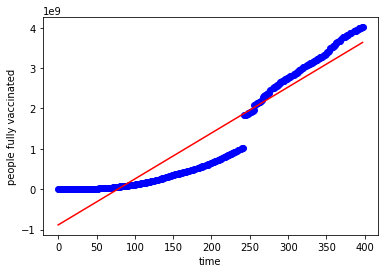

In [28]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("time")
plt.ylabel("people fully vaccinated")
plt.show()

In [29]:
test_x2 = np.asanyarray(test2[['date_delta']])
test_y2 = np.asanyarray(test2[['people_fully_vaccinated']])
test_y_2 = regr2.predict(test_x2)

metrics.r2_score(test_y2, test_y_2)

0.871918635146577

<h3>2. Polynomial regression models</h3>

<b>2.1. Quadratic model</b>

In [30]:
poly2_2 = PolynomialFeatures(degree=2)
train_x_poly2_2 = poly2_2.fit_transform(train_x2)

In [31]:
clf2_2 = linear_model.LinearRegression()
train_y_2_2 = clf2_2.fit(train_x_poly2_2, train_y2)
# The coefficients
print ('Coefficients: ', clf2_2.coef_)
print ('Intercept: ',clf2_2.intercept_)

Coefficients:  [[       0.         -1578381.93517368    32907.72756598]]
Intercept:  [-49779074.07922387]


Text(0, 0.5, 'people fully vaccinated')

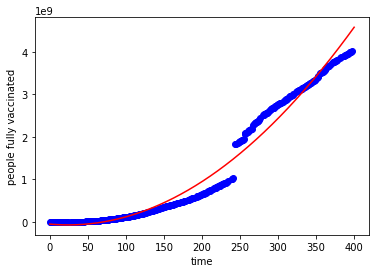

In [32]:
plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 400.0, 0.1)
yy = clf2_2.intercept_[0]+ clf2_2.coef_[0][1]*XX+ clf2_2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people fully vaccinated")

In [33]:
test_x_poly2_2 = poly2_2.fit_transform(test_x2)
test_y_2_2 = clf2_2.predict(test_x_poly2_2)

metrics.r2_score(test_y2, test_y_2_2)

0.9709159479606457

<b>2.2. Cubic model</b>

In [34]:
poly2_3 = PolynomialFeatures(degree=3)
train_x_poly2_3 = poly2_3.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00 -1.10463082e+07  9.31228267e+04 -1.01778474e+02]]
Intercept:  [2.54577147e+08]


0.9767013960923538

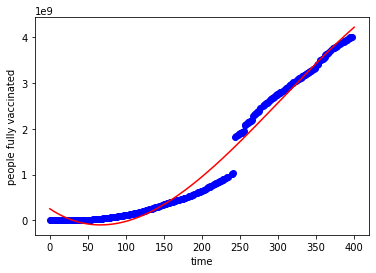

In [35]:
clf2_3 = linear_model.LinearRegression()
train_y_2_3 = clf2_3.fit(train_x_poly2_3, train_y2)
# The coefficients
print ('Coefficients: ', clf2_3.coef_)
print ('Intercept: ',clf2_3.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 400.0, 0.1)
yy = clf2_3.intercept_[0]+ clf2_3.coef_[0][1]*XX + clf2_3.coef_[0][2]*np.power(XX, 2) + clf2_3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people fully vaccinated")

test_x_poly2_3 = poly2_3.fit_transform(test_x2)
test_y_2_3 = clf2_3.predict(test_x_poly2_3)

metrics.r2_score(test_y2, test_y_2_3)

<h3>2.3. Degree 4 polynomial regression</h3>

In [36]:
poly2_4 = PolynomialFeatures(degree=4)
train_x_poly2_4 = poly2_4.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00  6.43787106e+06 -1.09883242e+05  7.00711330e+02
  -1.01413911e+00]]
Intercept:  [-68637833.89650774]


0.9862846964135377

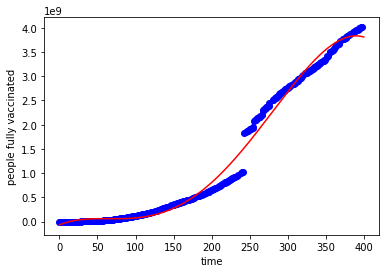

In [37]:
clf2_4 = linear_model.LinearRegression()
train_y_2_4 = clf2_4.fit(train_x_poly2_4, train_y2)
# The coefficients
print ('Coefficients: ', clf2_4.coef_)
print ('Intercept: ',clf2_4.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated, color='blue')
XX = np.arange(0.0, 400.0, 0.1)
yy = clf2_4.intercept_[0] + clf2_4.coef_[0][1]*XX + clf2_4.coef_[0][2]*np.power(XX, 2) + \
    clf2_4.coef_[0][3]*np.power(XX, 3) + clf2_4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people fully vaccinated")

test_x_poly2_4 = poly2_4.fit_transform(test_x2)
test_y_2_4 = clf2_4.predict(test_x_poly2_4)

metrics.r2_score(test_y2, test_y_2_4)

<h3>2.4. Degree 5 polynomial regression</h3>

In [38]:
poly2_5 = PolynomialFeatures(degree=5)
train_x_poly2_5 = poly2_5.fit_transform(train_x2)

Coefficients:  [[ 0.00000000e+00  1.27107507e+07 -2.22553753e+05  1.46138627e+03
  -3.17139578e+00  2.17145681e-03]]
Intercept:  [-1.44661232e+08]


0.9858037184939299

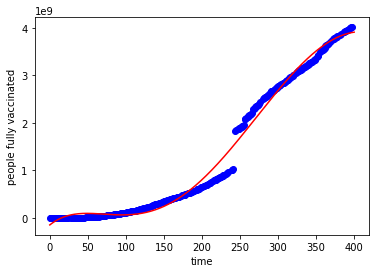

In [39]:
clf2_5 = linear_model.LinearRegression()
train_y_2_5 = clf2_5.fit(train_x_poly2_5, train_y2)
# The coefficients
print ('Coefficients: ', clf2_5.coef_)
print ('Intercept: ',clf2_5.intercept_)

plt.scatter(train2.date_delta, train2.people_fully_vaccinated,  color='blue')
XX = np.arange(0.0, 400.0, 0.1)
yy = clf2_5.intercept_[0] + clf2_5.coef_[0][1]*XX + clf2_5.coef_[0][2]*np.power(XX, 2) + \
    clf2_5.coef_[0][3]*np.power(XX, 3) + clf2_5.coef_[0][4]*np.power(XX, 4) + clf2_5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("time")
plt.ylabel("people fully vaccinated")

test_x_poly2_5 = poly2_5.fit_transform(test_x2)
test_y_2_5 = clf2_5.predict(test_x_poly2_5)

metrics.r2_score(test_y2, test_y_2_5)

<h2>Prognosis of completed vaccination</h2>

<h3>1. Completion of vaccination with, at least, one dose of vaccine</h3>

In [40]:
last_date = df_world1['date'].max()
df_date = df_world1['date']==last_date
df_last_date = df_world1[df_date]
last_date_index = df_last_date.index[0]
world_population = df_last_date.loc[last_date_index,'population']
world_population

7874965730.0

<b>1.1. Linear regression model</b>

In [41]:
#calculating when all the people will be vaccinated (according to the linear regression model)
x_1 = (world_population + regr1.intercept_[0])/regr1.coef_[0,0]
x_1_comp = x_1 - df_world1_ml['date_delta'].max()
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")

According to the linear model vaccination will be completed in 101 days


<b>1.2. Polynomial quadratic regression model</b>

In [42]:
#calculating when all the people will be vaccinated (according to the polynomial quadratic regression model)
a = clf1_2.coef_[0,2]
b = clf1_2.coef_[0,1]
c = clf1_2.intercept_[0] - world_population
from math import sqrt
D = b**2 - 4*a*c
x_1_1 = (-b + sqrt(D))/(2*a)
x_1_2 = (-b - sqrt(D))/(2*a)  #this root is negative, so we drop it
x_1_1_comp = x_1_1 - df_world1_ml['date_delta'].max()
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")

According to the quadratic model vaccination will be completed in 105 days


<b>1.3. Polynomial cubic regression model</b>

In [43]:
#calculations using cubic regression model
x_3 = clf1_3.coef_[0]
x_3[0] = clf1_3.intercept_[0] - world_population
x_3_tr = np.flip(x_3)
np.roots(x_3_tr)

array([ 456.29826713+168.94532999j,  456.29826713-168.94532999j,
       -183.64170917  +0.j        ])

The cubic model has only complex and negative roots, which means that according to this model, the whole population of the world will never be vaccinated. Let's find the maximum number of people that will be vaccinated.

In [44]:
x_3_dif = x_3_tr
x_3_dif[0] = 3*x_3_dif[0]
x_3_dif[1] = 2*x_3_dif[1]
x_3_diff = x_3_dif[:-1]
roots_3 = np.roots(x_3_diff)
roots_3

array([432.69103007,  53.27885332])

In [45]:
day_max = roots_3[0] - df_world1_ml['date_delta'].max()
print("Maximum will be reached in: %.0f" % x_1_comp, "days")
people_max = clf1_3.intercept_[0] + clf1_3.coef_[0][1]*roots_3[0] +\
clf1_3.coef_[0][2]*np.power(roots_3[0],2) + clf1_3.coef_[0][3]*np.power(roots_3[0],3)
print("Maximum of people who will be vaccinated:", people_max)
print("Percentage of the total population:", (people_max/world_population)*100, "%")
print("Number of people already vaccinated:", df_world1['people_vaccinated'].max())
print("Percentage of the total population:", (df_world1['people_vaccinated'].max()/world_population)*100, "%")

Maximum will be reached in: 101 days
Maximum of people who will be vaccinated: 243358012.45899963
Percentage of the total population: 3.0902739237571213 %
Number of people already vaccinated: 4702962017.0
Percentage of the total population: 59.72041248489344 %


This result is obviously incorrect because the number of people who have been already vaccinated is much higher than this model predicts. This means that the cubic regression model for vaccination progress cannot be used for prediction when the whole population of the world will be vaccinated or when will be reached the maximum number of people vaccinated.

<b>1.4. Polynomial 4-degree regression model</b>

In [46]:
#calculations using 4-degree model
x_4 = clf1_4.coef_[0]
x_4[0] = clf1_4.intercept_[0] - world_population
x_4_tr = np.flip(x_4)
np.roots(x_4_tr)

array([ 421.93367157+131.48488628j,  421.93367157-131.48488628j,
       -207.62256622+209.67577157j, -207.62256622-209.67577157j])

This model has only complex roots.

In [47]:
x_4_dif = x_4
x_4_dif[0] = 4*x_4_dif[0]
x_4_dif[1] = 3*x_4_dif[1]
x_4_dif[2] = 2*x_4_dif[2]
x_4_diff = x_4_dif[:-1]
roots_4 = np.roots(x_4_diff)
roots_4

array([ 0.00208053+0.j        , -0.00120846+0.00125225j,
       -0.00120846-0.00125225j])

In [48]:
day_max_4 = roots_4[0] - df_world1_ml['date_delta'].max()
day_max_4

(-408.9979194705568+0j)

All the extremums of this function were already reached. This means that this function cannot be used in order to prognose the progress of vaccination in future.

<b>1.5. Polynomial 5-degree regression model</b>

In [49]:
#calculations using 5-degree model
x_5 = clf1_5.coef_[0]
x_5[0] = clf1_5.intercept_[0] - world_population
x_5_tr = np.flip(x_5)
np.roots(x_5_tr)

array([517.02425566  +0.j        , 369.12230214+171.37645632j,
       369.12230214-171.37645632j, -61.02169822+140.27167419j,
       -61.02169822-140.27167419j])

In [50]:
roots_5 = np.roots(x_5_tr)
x_1_5_comp = np.real(roots_5[0]) - df_world1_ml['date_delta'].max()
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the 5-degree model vaccination will be completed in 108 days


<b>Conclusion</b>

In [51]:
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the linear model vaccination will be completed in 101 days
According to the quadratic model vaccination will be completed in 105 days
According to the 5-degree model vaccination will be completed in 108 days


Therefore, these three models give similar results.

<h3>2. Completion of full vaccination</h3>

<b>2.1. Linear regression model</b>

In [52]:
#calculating when all the people will be fully vaccinated (according to the linear regression model)
x_2 = (world_population + regr2.intercept_[0])/regr2.coef_[0,0]
x_2_comp = x_2 - df_world2_ml['date_delta'].max()
print("According to the linear model full vaccination will be completed in %.0f" % x_2_comp, "days")

According to the linear model full vaccination will be completed in 217 days


<b>2.2. Polynomial quadratic regression model</b>

In [53]:
#calculating when all the people will be vaccinated (according to the polynomial quadratic regression model)
a = clf2_2.coef_[0,2]
b = clf2_2.coef_[0,1]
c = clf2_2.intercept_[0] - world_population
from math import sqrt
D = b**2 - 4*a*c
x_2_1 = (-b + sqrt(D))/(2*a)
x_2_2 = (-b - sqrt(D))/(2*a) #this root is negative, so we drop it
x_2_1_comp = x_2_1 - df_world2_ml['date_delta'].max()
print("According to the quadratic model vaccination will be completed in %.0f" % x_2_1_comp, "days")

According to the quadratic model vaccination will be completed in 118 days


<b>2.3. Polynomial cubic regression model</b>

In [54]:
#calculations using cubic model
x_3_2 = clf2_3.coef_[0]
x_3_2[0] = clf2_3.intercept_[0] - world_population
x_3_2_tr = np.flip(x_3_2)
np.roots(x_3_2_tr)

array([ 564.43454648+177.27483001j,  564.43454648-177.27483001j,
       -213.91308453  +0.j        ])

The cubic model has only complex and negative roots, which means that according to this model, the whole population of the world will never be vaccinated. Let's find the maximum number of people that will be vaccinated.

In [55]:
x_3_2_dif = x_3_2_tr
x_3_2_dif[0] = 3*x_3_2_dif[0]
x_3_2_dif[1] = 2*x_3_2_dif[1]
x_3_2_diff = x_3_2_dif[:-1]
roots_3_2 = np.roots(x_3_2_diff)
roots_3_2

array([543.39346861,  66.57720368])

In [56]:
day_max = roots_3_2[0] - df_world2_ml['date_delta'].max()
print("Maximum will be reached in:", day_max, "days")
people_max = clf2_3.intercept_[0] + clf2_3.coef_[0][1]*roots_3_2[0] +\
clf2_3.coef_[0][2]*np.power(roots_3_2[0],2) + clf2_3.coef_[0][3]*np.power(roots_3_2[0],3)
print("Maximum of people who will be fully vaccinated:", people_max)
print("Percentage of the total population:", (people_max/world_population)*100, "%")
print("Number of people already fully vaccinated:", df_world2['people_fully_vaccinated'].max())
print("Percentage of the total population:", (df_world2['people_fully_vaccinated'].max()/world_population)*100, "%")

Maximum will be reached in: 146.39346861257013 days
Maximum of people who will be fully vaccinated: 254577147.28253174
Percentage of the total population: 3.2327397478405504 %
Number of people already fully vaccinated: 4011094460.0
Percentage of the total population: 50.93475448051251 %


This model cannot be used to predict the when the full vaccination is reached because it gives the maximum number of fully vaccinated people much less than it is now.

<b>2.4. Polynomial 4-degree regression model</b>

In [57]:
x_4_2 = clf2_4.coef_[0]
x_4_2[0] = clf2_4.intercept_[0] - world_population
x_4_2_tr = np.flip(x_4_2)
np.roots(x_4_2_tr)

array([419.09517329+122.71167933j, 419.09517329-122.71167933j,
       -73.62416131+188.82250002j, -73.62416131-188.82250002j])

This model has only complex roots.

In [58]:
x_4_2_dif = x_4_2
x_4_2_dif[0] = 4*x_4_2_dif[0]
x_4_2_dif[1] = 3*x_4_2_dif[1]
x_4_2_dif[2] = 2*x_4_2_dif[2]
x_4_2_diff = x_4_2_dif[:-1]
roots_4_2 = np.roots(x_4_2_diff)
roots_4_2

array([-0.00077256+0.00310583j, -0.00077256-0.00310583j,
        0.00215295+0.j        ])

All the extremums of this function were already reached. This means that this function cannot be used in order to prognose the progress of vaccination in future.

<b>2.5. Polynomial 5-degree regression model</b>

In [59]:
x_5_2 = clf2_5.coef_[0]
x_5_2[0] = clf2_5.intercept_[0] - world_population
x_5_2_tr = np.flip(x_5_2)
np.roots(x_5_2_tr)

array([725.79772596  +0.j        , 418.24052861+156.37884527j,
       418.24052861-156.37884527j, -50.89328334+151.43122268j,
       -50.89328334-151.43122268j])

In [60]:
roots_5_2 = np.roots(x_5_2_tr)
x_2_5_comp = np.real(roots_5_2[0]) - df_world2_ml['date_delta'].max()
print("According to the 5-degree model vaccination will be completed in %.0f" % x_2_5_comp, "days")

According to the 5-degree model vaccination will be completed in 329 days


<b>Conclusion</b>

In [61]:
print("According to the linear model full vaccination will be completed in %.0f" % x_2_comp, "days")
print("According to the quadratic model vaccination will be completed in %.0f" % x_2_1_comp, "days")
print("According to the 5-degree model vaccination will be completed in %.0f" % x_2_5_comp, "days")

According to the linear model full vaccination will be completed in 217 days
According to the quadratic model vaccination will be completed in 118 days
According to the 5-degree model vaccination will be completed in 329 days


These three models give very different results. However, polynomial regression models with degrees 6 and higher cannot be used for prediction because they give either very fast growth or very fast drop after the dates from the dataset. That is, they give either too optimistic results (completion of full vaccination in less then 30 days, which is much earlier than completion of vaccination with 1 dose of vaccine and therefore is impossible) or they give too pessimistic results (fast drop of the number of new fully vaccinated people in a very short time). Therefore, these models cannot be used. LASSO and Rigde models do not give goo result either.

The diagram of data from dataset of the full vaccination looks like this:

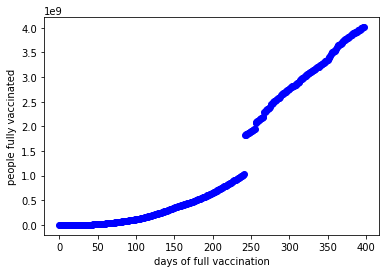

In [62]:
plt.scatter(df_world2_ml.date_delta, df_world2_ml.people_fully_vaccinated, color='blue')
plt.xlabel("days of full vaccination")
plt.ylabel("people fully vaccinated")
plt.show()

From this diagram, it is clear that other non-linear funtions (exponential, logarithmic, etc.) cannot be used for approximation.

On the other hand, for the models for vaccination (with one dose of vaccine), the results are following:

In [63]:
print("According to the linear model vaccination will be completed in %.0f" % x_1_comp, "days")
print("According to the quadratic model vaccination will be completed in %.0f" % x_1_1_comp, "days")
print("According to the 5-degree model vaccination will be completed in %.0f" % x_1_5_comp, "days")

According to the linear model vaccination will be completed in 101 days
According to the quadratic model vaccination will be completed in 105 days
According to the 5-degree model vaccination will be completed in 108 days


Since most vaccines require two doses (and some require only one dose) and the interval between the two doses usually should be 14, 21, or 28 days, it can be concluded that the full vaccination should be completed about 28 days after the vaccination with one dose of vaccine.

<h3>Conclusion</h3>

Regression models (linear regression, and polynomial regression of degrees 2 and 5) for the completion of vaccination with, at least, one dose of vaccine, give quite close results, which are within 110 days from now. However, regression models for the completion of full vaccination give very different results. Nevertheless, since most vaccines require two doses (and some require only one dose) and the interval between the two doses usually should be 14, 21, or 28 days, it can be concluded that the full vaccination should be completed about 28 days after the vaccination with one dose of vaccine, that is, within 140 days from now.